In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
#url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
df = pd.read_csv("HR-Employee-Attrition1.csv")

In [62]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [63]:
df.shape

(1470, 35)

In [64]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


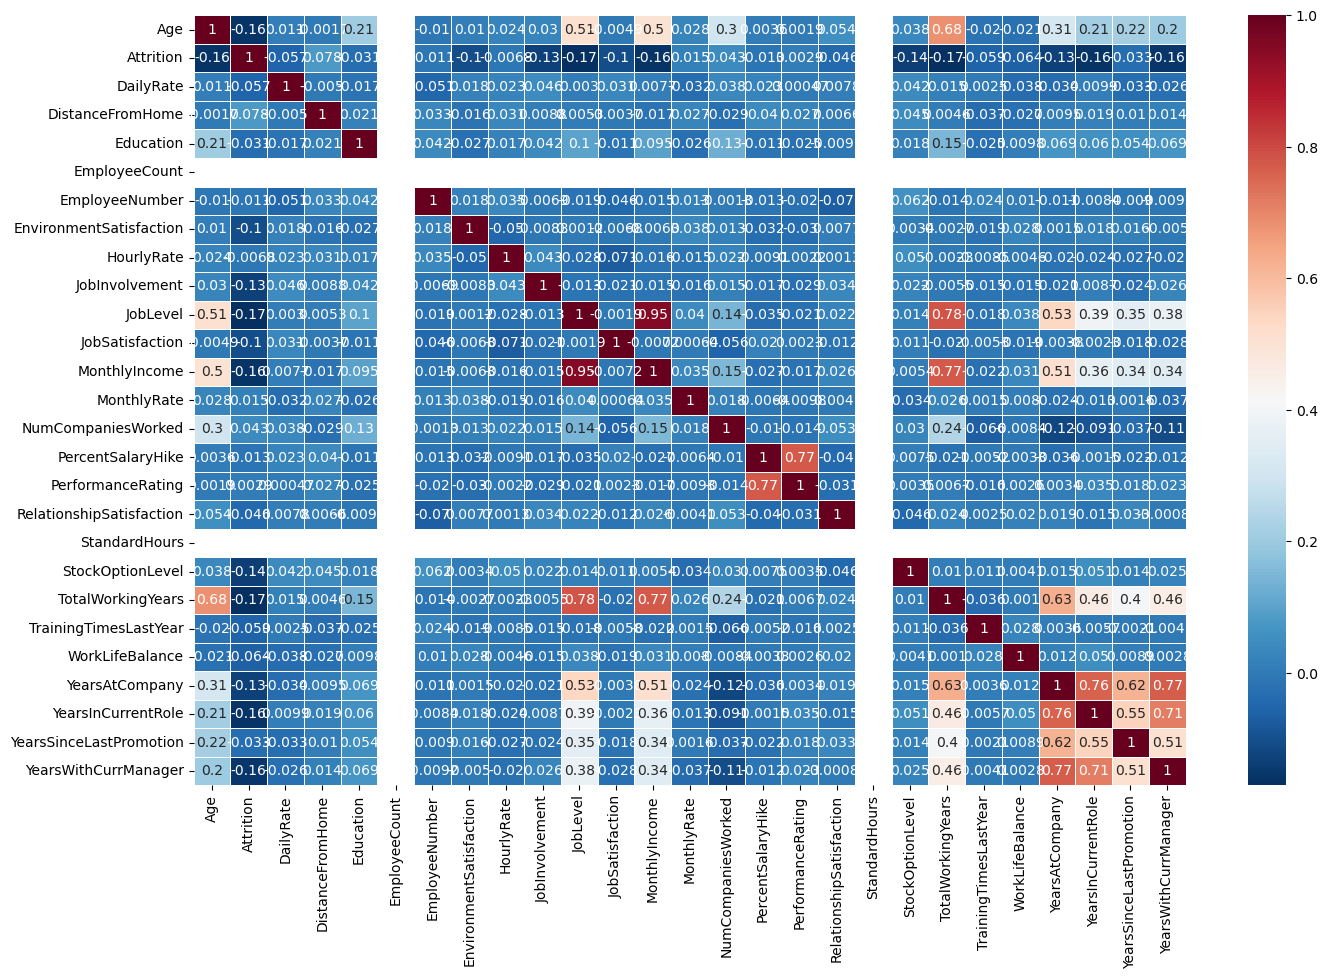

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson = df.corr(method='pearson')

plt.figure(figsize=(16, 10))
sns.heatmap(pearson,
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

plt.show()


Text(0.5, 1.0, 'Number of Attrition Reported by Education Field')

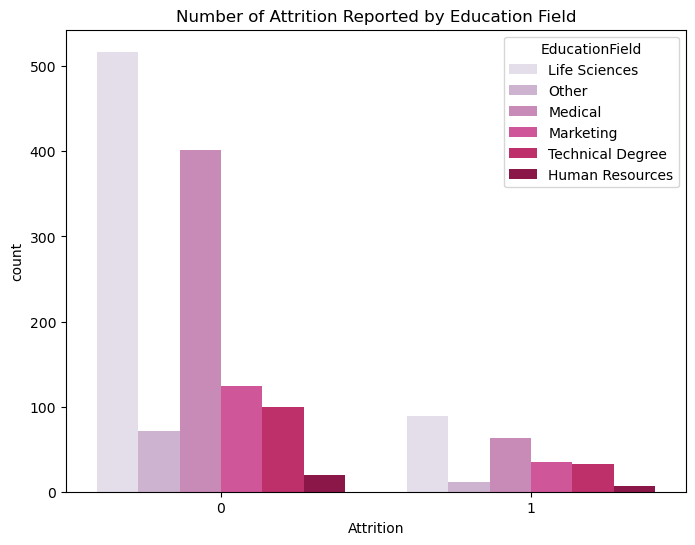

In [66]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize']=(8,6)
sns.countplot(x=df['Attrition'],hue='EducationField',data=df,palette='PuRd').set_title("Number of Attrition Reported by Education Field")

In [67]:
df[(df['Attrition']==1)].groupby(["EducationField"]).size()/df.groupby(['EducationField']).size()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

Text(0.5, 1.0, 'Number of Attrition Reported by Job Roles')

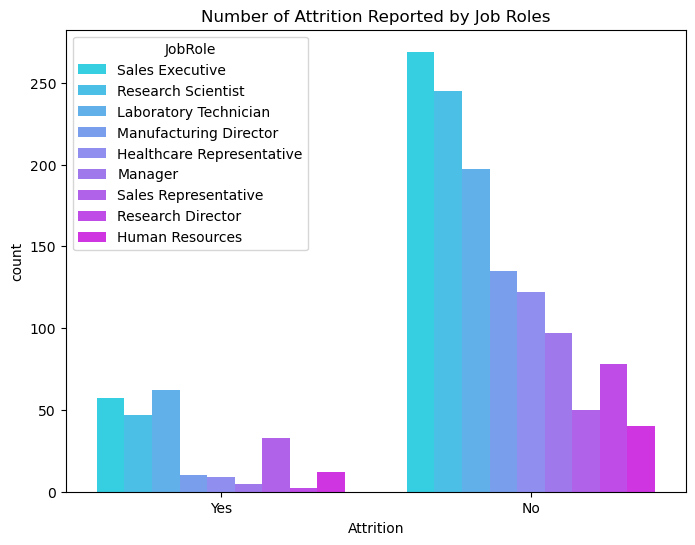

In [12]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize']=(8,6)
sns.countplot(x=df['Attrition'],hue='JobRole',data=df,palette='cool').set_title("Number of Attrition Reported by Job Roles")

In [68]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

In [69]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size()

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
dtype: int64

In [70]:
df[(df["Attrition"] == 0)].groupby(["EducationField"]).size()

EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
dtype: int64

Text(0.5, 1.0, 'Number of Attritions Reported by Over Time')

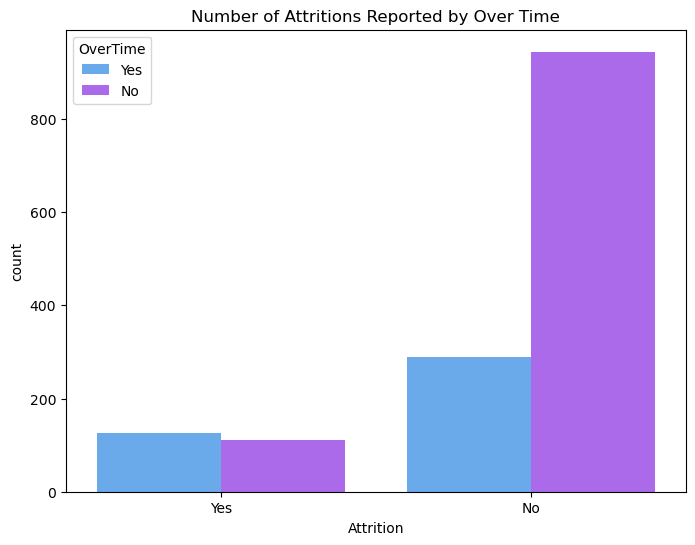

In [18]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='OverTime',data=df, palette = 'cool').set_title("Number of Attritions Reported by Over Time")

Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

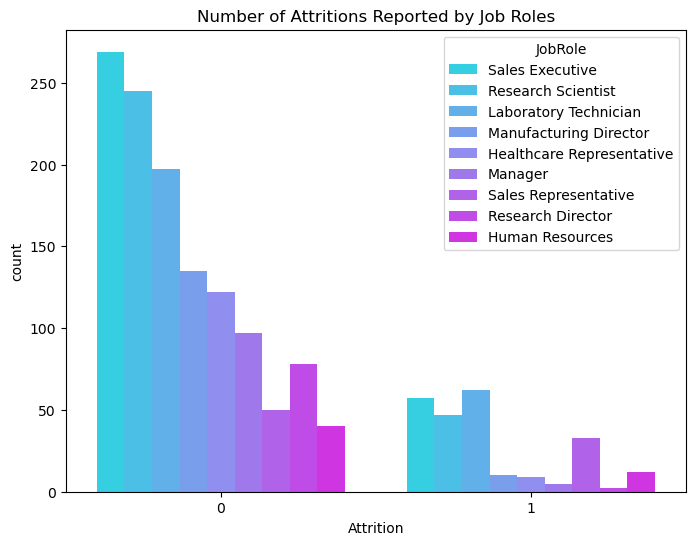

In [71]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='JobRole',data=df, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [72]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
No     0.104364
Yes    0.305288
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

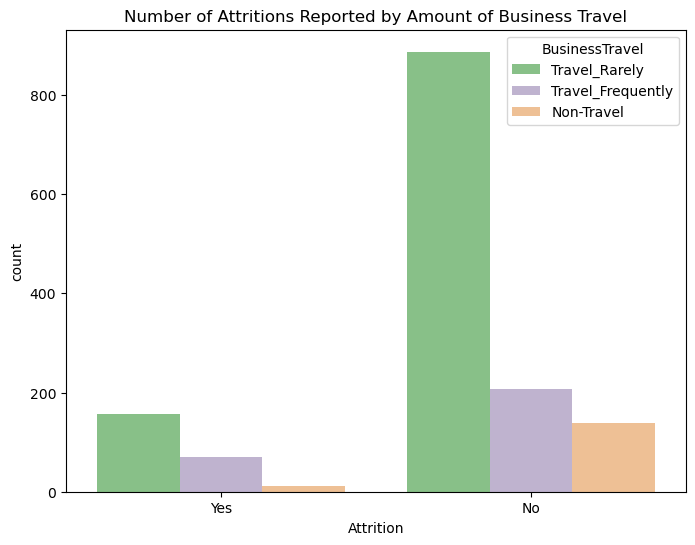

In [21]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='BusinessTravel',data=df, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [73]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

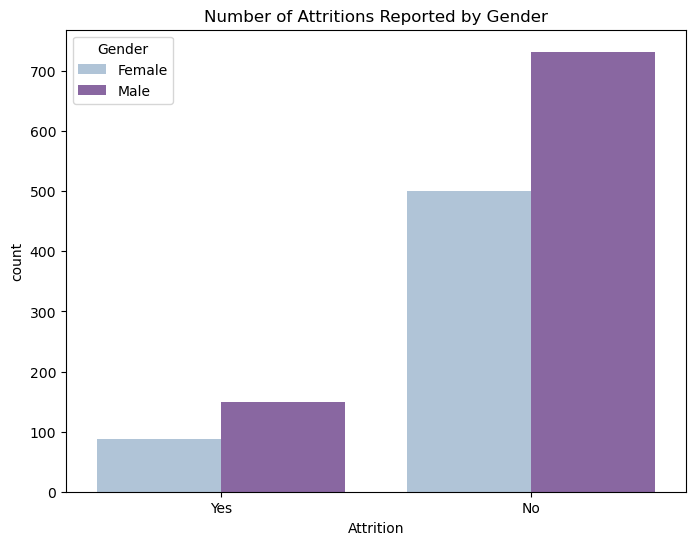

In [23]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='Gender',data=df, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")

In [74]:
df[(df["Attrition"] == 1)].groupby(["Gender"]).size() / df.groupby(["Gender"]).size()

Gender
Female    0.147959
Male      0.170068
dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


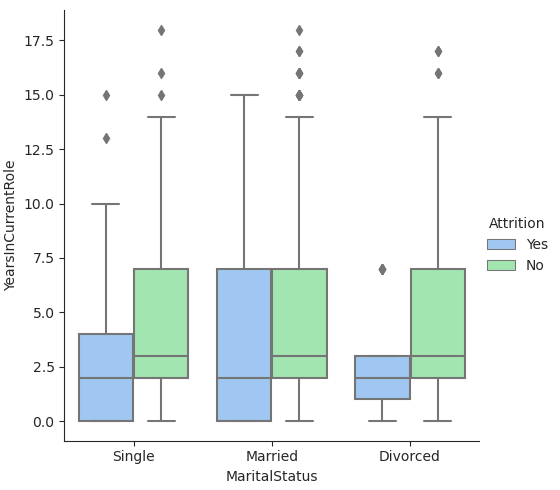

In [25]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("MaritalStatus", "YearsInCurrentRole", "Attrition", data=df, kind="box")

Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

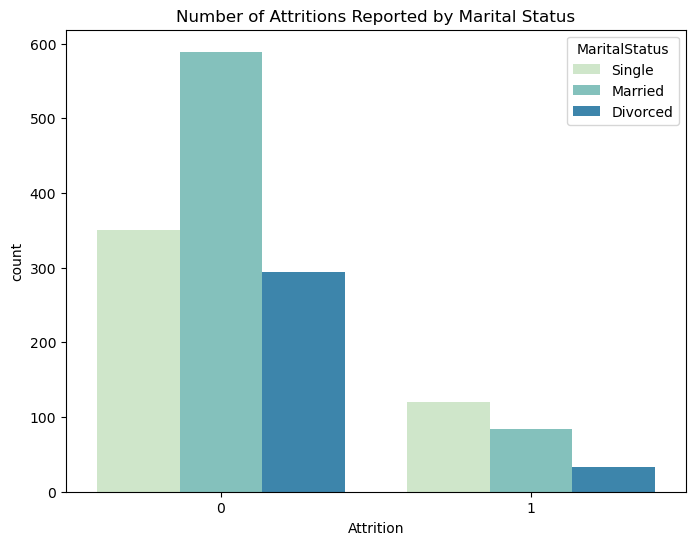

In [75]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='MaritalStatus',data=df, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [76]:
df[(df["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / df.groupby(["MaritalStatus"]).size()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
dtype: float64

In [77]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

In [78]:
df2 = df.copy()

In [79]:
# We define our own function to target encode all the categorical variables, replacing them with associated mean relation to fraud_reported. 
# This is because most models only take numerical variables.

def numericizer(df, col, new_df_name):
    new_df_name = df[[col,'Attrition']].groupby([col],as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
    df[col] = df[col].replace(new_df_name[col].values, 1 - new_df_name['Attrition'].values)
    new_df_name = None

In [80]:
lets_use_correlation = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

for i in lets_use_correlation:
    try:
        numericizer(df2, i, "blah")
    except: 
        print(i)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.850431,1102,0.793722,1,2,0.853135,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,0.750903,279,0.861602,8,1,0.853135,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0.850431,1373,0.861602,2,2,0.865854,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,0.750903,1392,0.861602,3,4,0.853135,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0.850431,591,0.861602,2,1,0.864224,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0.750903,884,0.861602,23,2,0.864224,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0.850431,613,0.861602,6,1,0.864224,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0.850431,155,0.861602,4,3,0.853135,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,0.750903,1023,0.793722,2,3,0.864224,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [81]:
# Changing binary representation of Gender, Overtime variables to 1/0
df2.Gender = df.Gender.map({'Male':1, 'Female':0})
df2.OverTime = df.OverTime.map({'Yes':1, 'No':0})

<AxesSubplot:>

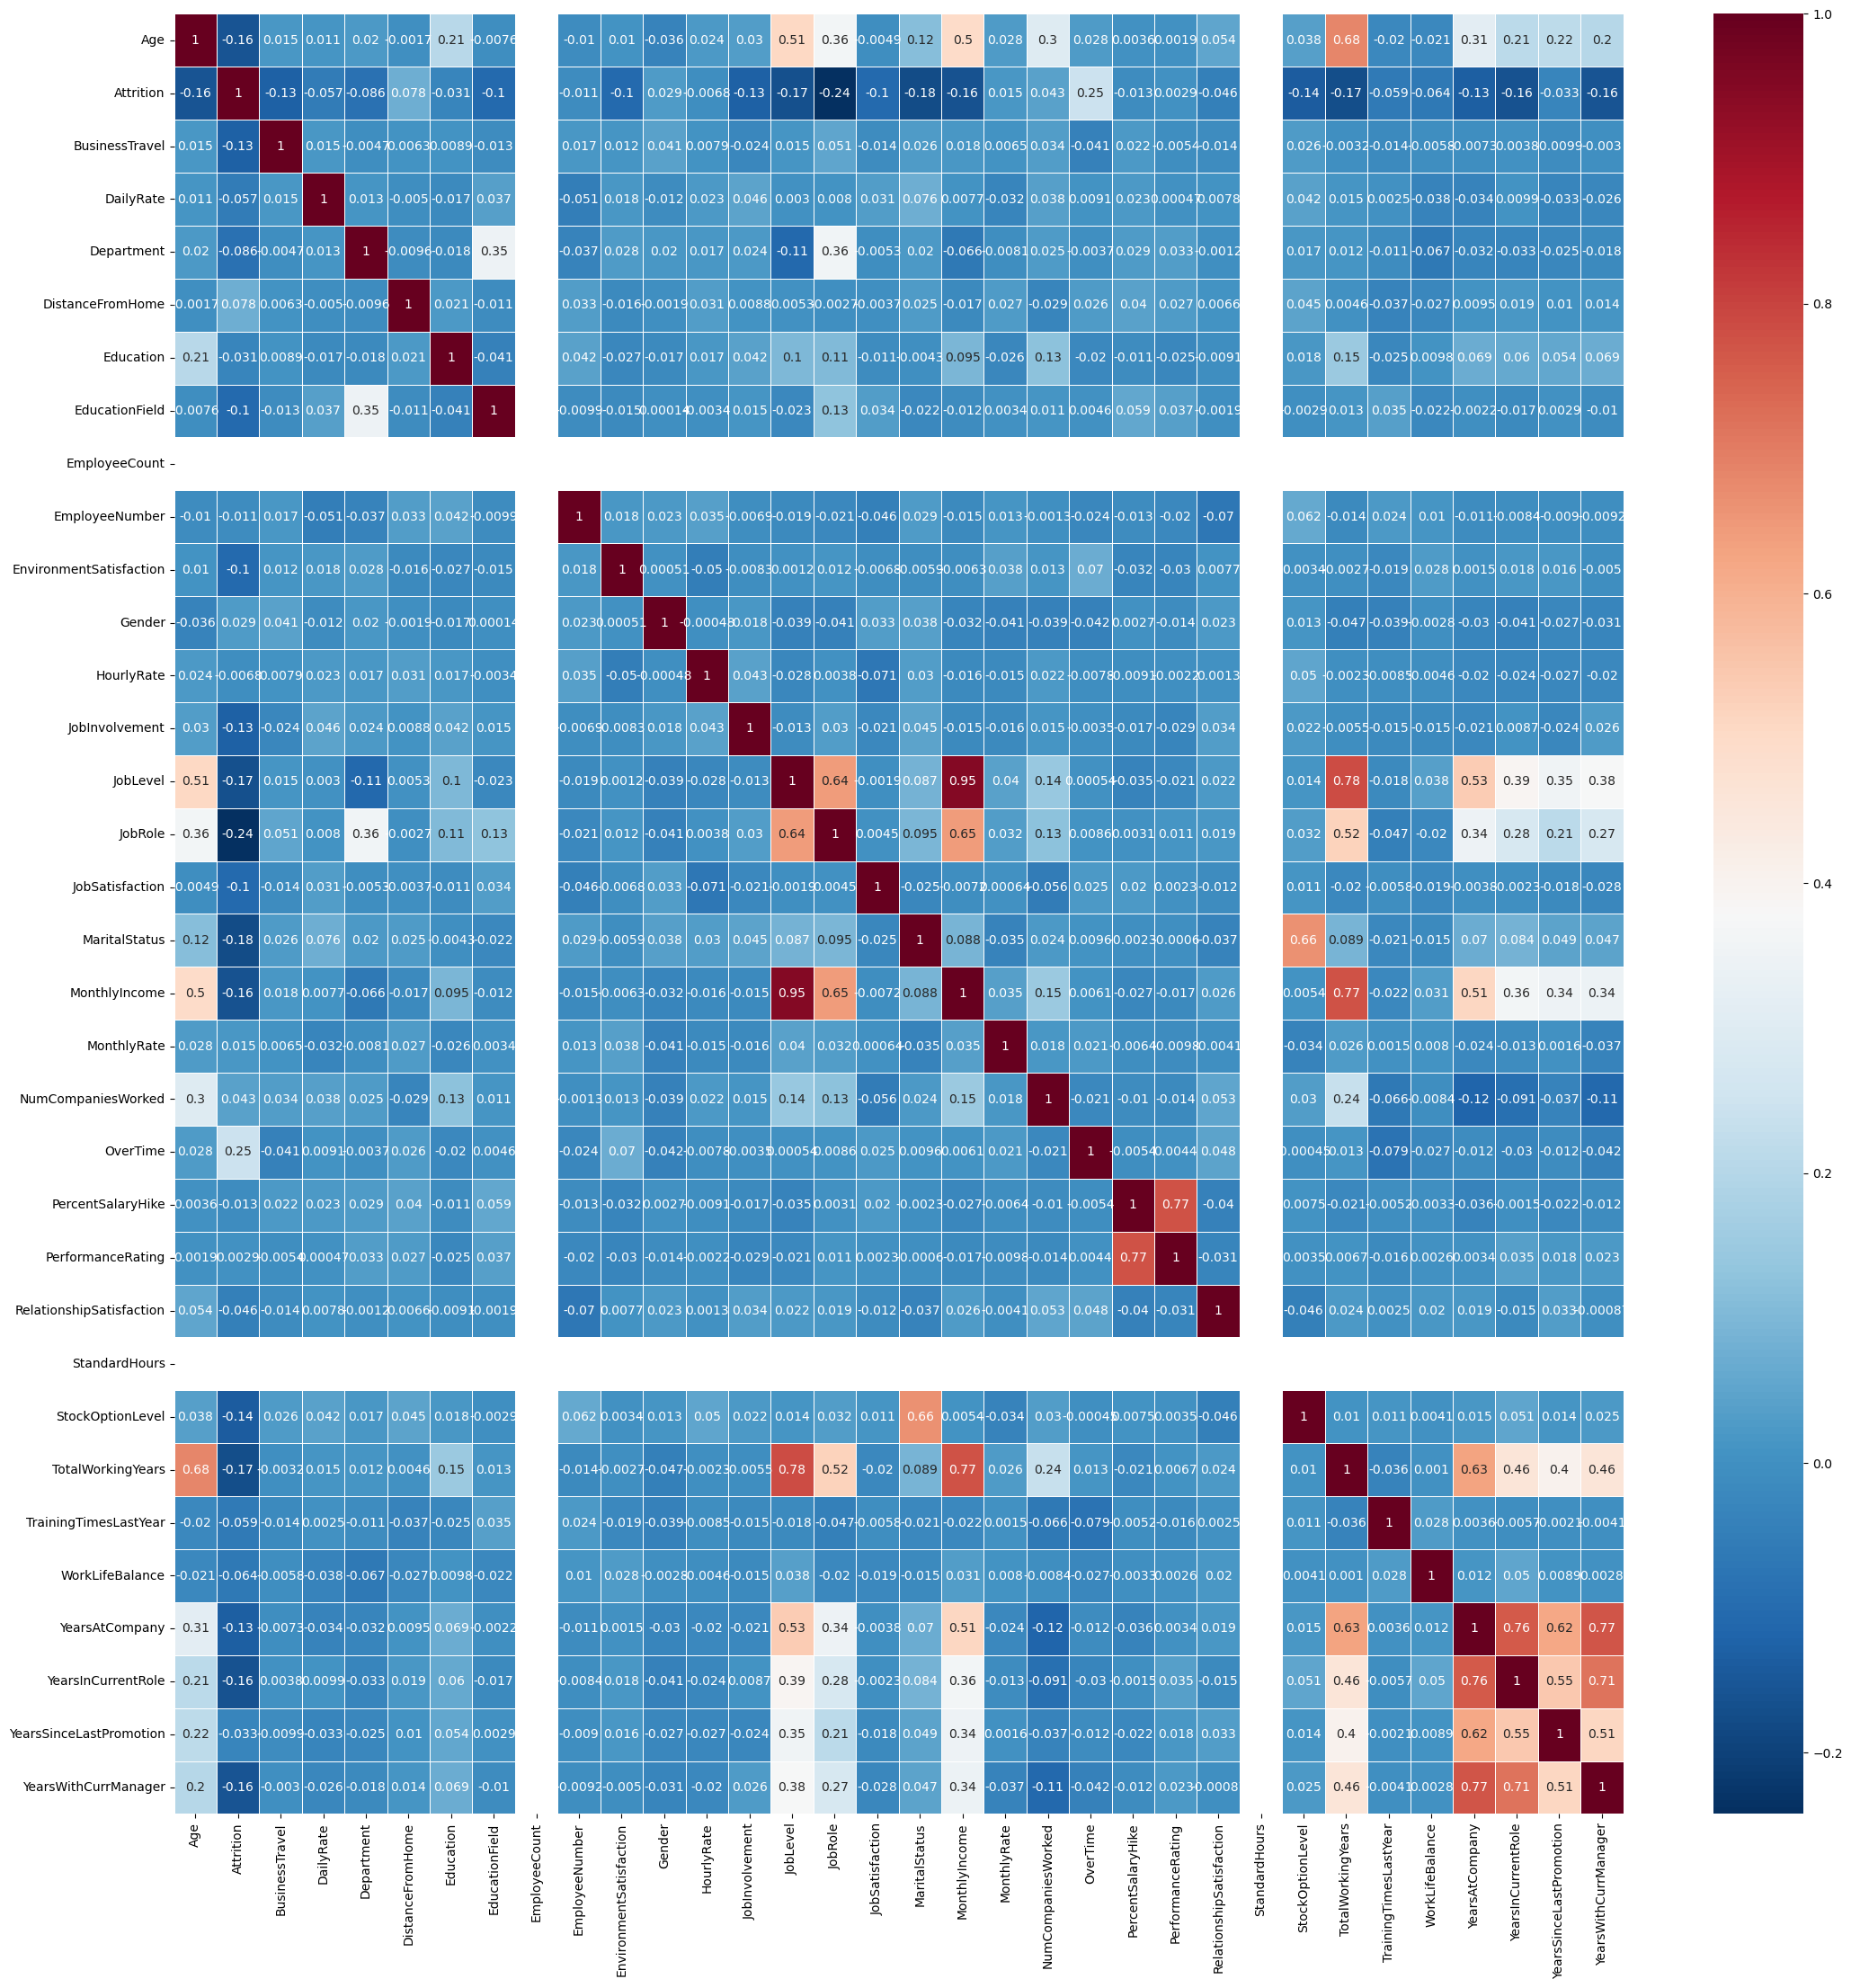

In [82]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = df2.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

####2. Feature Selection

This heatmap again tells us how related the variables to Attrition. We will pick the ones that have an absolute correlation value greater than 0.1 for our model

In [83]:
# Picking the features that have absolute correlation value greater than 0.1 
df3 = df2[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

####3. Modeling

In [84]:
# Separating dataset into x & y, where y is the target variable
x = df3.drop('Attrition', axis = 1)
y = df3['Attrition']
# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


In [44]:
# # Building logisticregression model to fit training model
# # You can now make predictions using clf.predict(x_test) and evaluate the model's performance.
# #from sklearn.linear_model import LogisticRegression
# #LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
# #LR
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Assuming df is your DataFrame with the data
# # Separate your target variable (y) and input features (X)
# X = df.drop(columns=['Attrition'])  # Replace 'target_column' with the actual target column name
# y = df['Attrition']

# # Split your data into a training set and a test set
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86)

# # Define preprocessing steps for categorical variables using one-hot encoding
# categorical_cols = X.select_dtypes(include=['object']).columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), categorical_cols)
#     ])

# # Create a logistic regression model
# model = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86)

# # Create a pipeline that includes preprocessing and the model
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('model', model)])

# # Fit the model to the training data
# clf.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=800, random_state=86,
                                    solver='newton-cg'))])

In [85]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR

C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [87]:
# Using training model to predict
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

####4. Model Accuracy

In [88]:
# Create confusion matrix function
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

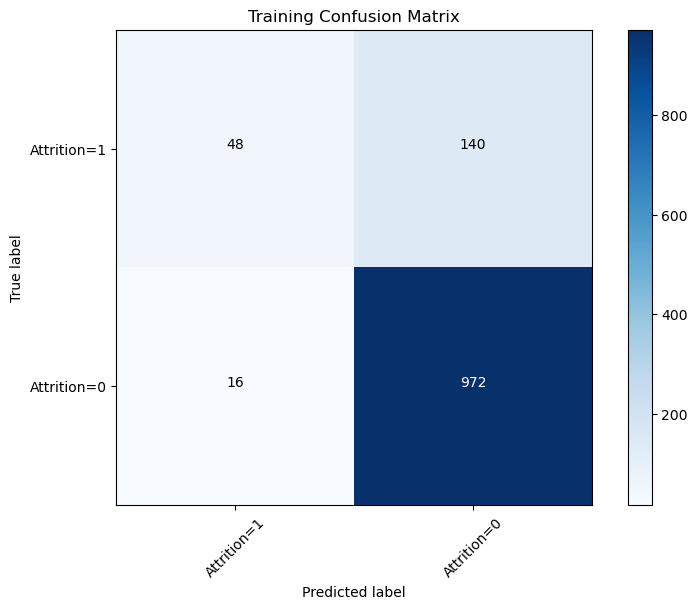

In [89]:
# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')

In [90]:
# Scoring the training model
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       988
           1       0.75      0.26      0.38       188

    accuracy                           0.87      1176
   macro avg       0.81      0.62      0.65      1176
weighted avg       0.85      0.87      0.84      1176



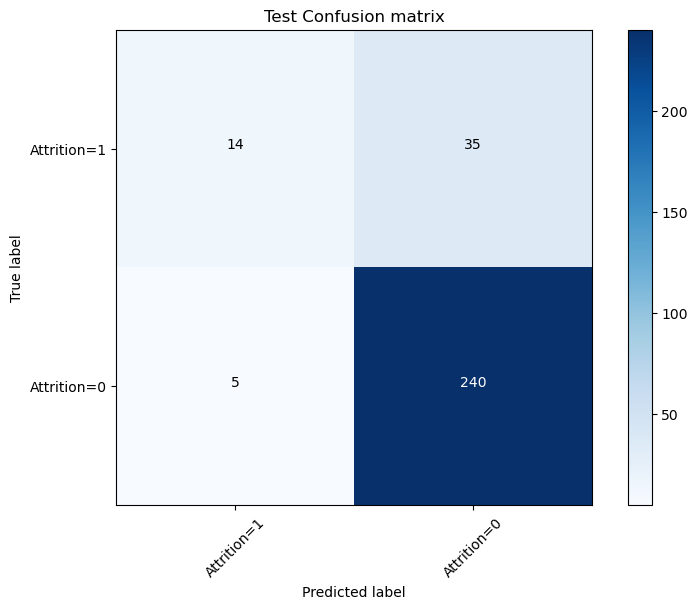

In [91]:
# Compute confusion matrix for testing data
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Test Confusion matrix')

In [92]:
print (classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.74      0.29      0.41        49

    accuracy                           0.86       294
   macro avg       0.80      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



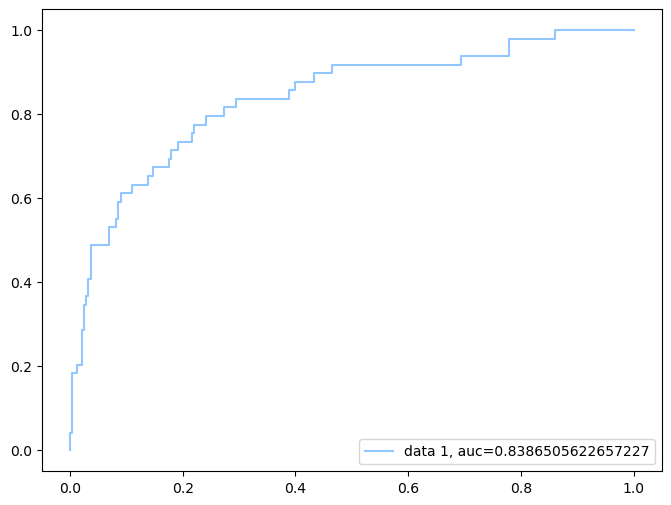

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

####5. Logistic Regression Analysis

In [94]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.352552
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.202     
Dependent Variable:   Attrition          AIC:                1068.5037 
Date:                 2023-10-24 20:42   BIC:                1153.1920 
No. Observations:     1470               Log-Likelihood:     -518.25   
Df Model:             15                 LL-Null:            -649.29   
Df Residuals:         1454               LLR p-value:        4.0102e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Age                     -0.0109   0.0119 -0.9159 0.3597 -0.0342

In [95]:
# Reselect features that have a p-value less than 0.05
df4 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [96]:
# Separating dataset into x & y, where y is the target variable
x1 = df4.drop('Attrition', axis = 1)
y1 = df4['Attrition']

In [97]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356714
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.192     
Dependent Variable:   Attrition          AIC:                1068.7397 
Date:                 2023-10-24 20:42   BIC:                1121.6698 
No. Observations:     1470               Log-Likelihood:     -524.37   
Df Model:             9                  LL-Null:            -649.29   
Df Residuals:         1460               LLR p-value:        1.0767e-48
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.3565   0.9490  6.6983 0.0000  4.4966

In [98]:
# Continue to Reselect features that have a p-value less than 0.05
df5 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [99]:
# Separating dataset into x & y, where y is the target variable
x1 = df5.drop('Attrition', axis = 1)
y1 = df5['Attrition']

In [100]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.357260
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.191     
Dependent Variable:   Attrition          AIC:                1068.3445 
Date:                 2023-10-24 20:43   BIC:                1115.9817 
No. Observations:     1470               Log-Likelihood:     -525.17   
Df Model:             8                  LL-Null:            -649.29   
Df Residuals:         1461               LLR p-value:        4.0707e-49
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.2164   0.9411  6.6056 0.0000  4.3719

In [101]:
# Continue to Reselect features that have a p-value less than 0.05
df6 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel']]

In [102]:
# Separating dataset into x & y, where y is the target variable
x1 = df6.drop('Attrition', axis = 1)
y1 = df6['Attrition']

In [103]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363654
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.177     
Dependent Variable:   Attrition          AIC:                1083.1425 
Date:                 2023-10-24 20:43   BIC:                1120.1936 
No. Observations:     1470               Log-Likelihood:     -534.57   
Df Model:             6                  LL-Null:            -649.29   
Df Residuals:         1463               LLR p-value:        1.0081e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.7398   0.9304  7.2437 0.0000  4.9162